## Given a hex maze configuration, we want a new one! 

This new config needs to be
1. Different by a single barrier
2. At least one path shorter and longer

In [1]:
import pandas as pd
from hex_maze_utils import get_next_barrier_set, single_barrier_moved

# Load the database and visualize it
df = pd.read_pickle('maze_configuration_database.pkl')
display(df)

,barriers,len12,len13,len23,reward_path_lengths,path_length_difference,optimal_paths_12,optimal_paths_13,optimal_paths_23,optimal_paths_all,choice_points,num_choice_points,cycles,num_cycles,isomorphic_mazes
0,"(37, 39, 7, 41, 14, 46, 20, 23, 30)",15,17,21,"[15, 17, 21]",6,"[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 1...","[[1, 4, 6, 8, 10, 13, 17, 21, 26, 22, 27, 32, ...",{13},1,[],0,"{(37, 8, 9, 40, 20, 21, 22, 27, 28), (34, 8, 4..."
1,"(34, 36, 37, 39, 10, 45, 14, 15, 20)",17,21,19,"[17, 21, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 25, 30, 3...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 22, 2...",{21},1,[],0,"{(34, 37, 8, 40, 10, 15, 18, 20, 26), (34, 35,..."
2,"(34, 7, 41, 11, 46, 17, 20, 28, 31)",23,19,17,"[23, 19, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 25, 30, 35, 4...","[[1, 4, 6, 8, 10, 13, 16, 12, 15, 19, 24, 29, ...",{35},1,"[[38, 49, 47, 42, 37, 32]]",1,"{(35, 7, 10, 44, 20, 22, 27, 28, 31), (32, 37,..."
3,"(34, 10, 42, 12, 45, 18, 23, 25, 31)",15,19,21,"[15, 19, 21]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 27, 22, 26, 21, 17, 13, 16, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 22, 27, 32, ...",{17},1,[],0,"{(34, 37, 8, 40, 13, 46, 15, 18, 25), (34, 37,..."
4,"(39, 9, 10, 46, 21, 22, 23, 26, 30)",23,17,17,"[23, 17, 17]",6,"[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...",{29},1,"[[32, 38, 49, 47, 42, 37], [12, 15, 19, 24, 20...",2,"{(34, 36, 8, 41, 9, 21, 23, 27, 30), (10, 11, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55891,"(34, 36, 7, 10, 42, 46, 19, 22, 25)",15,19,21,"[15, 19, 21]",6,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...","[[1, 4, 6, 8, 11, 14, 17, 13, 16, 20, 24, 29, ...","[[2, 49, 38, 32, 37, 31, 26, 21, 17, 13, 16, 2...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 37, 32, ...",{17},1,[],0,"{(34, 37, 7, 40, 9, 42, 14, 16, 25), (35, 37, ..."
55892,"(37, 7, 9, 13, 45, 16, 22, 25, 29)",17,19,15,"[17, 19, 15]",4,"[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 30, ...","[[2, 49, 47, 42, 46, 41, 36, 30, 35, 40, 44, 3...","[[1, 4, 6, 8, 11, 14, 17, 21, 26, 31, 36, 41, ...",{36},1,"[[34, 28, 33, 48, 43, 39]]",1,"{(32, 34, 40, 13, 15, 25, 26, 27, 31), (36, 10..."
55893,"(7, 39, 46, 17, 19, 22, 23, 24, 30)",17,23,17,"[17, 23, 17]",6,"[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...","[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...","[[2, 49, 38, 32, 37, 31, 36, 41, 45, 40, 35, 2...","[[1, 4, 6, 8, 10, 13, 16, 20, 25, 21, 26, 31, ...",{31},1,"[[32, 38, 49, 47, 42, 37]]",1,"{(32, 36, 7, 40, 11, 14, 17, 20, 23), (32, 36,..."
55894,"(34, 10, 11, 42, 45, 15, 22, 25, 30)",17,15,19,"[17, 15, 19]",4,"[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...","[[1, 4, 5, 7, 9, 12, 16, 20, 24, 19, 23, 28, 3...","[[2, 49, 38, 32, 37, 31, 26, 21, 17, 13, 16, 2...","[[1, 4, 5, 7, 9, 12, 16, 13, 17, 21, 26, 31, 3...",{16},1,"[[19, 23, 28, 33, 48, 43, 39, 44, 40, 35, 29, ...",1,"{(34, 37, 8, 12, 45, 18, 21, 23, 25), (37, 40,..."


Maze 1:


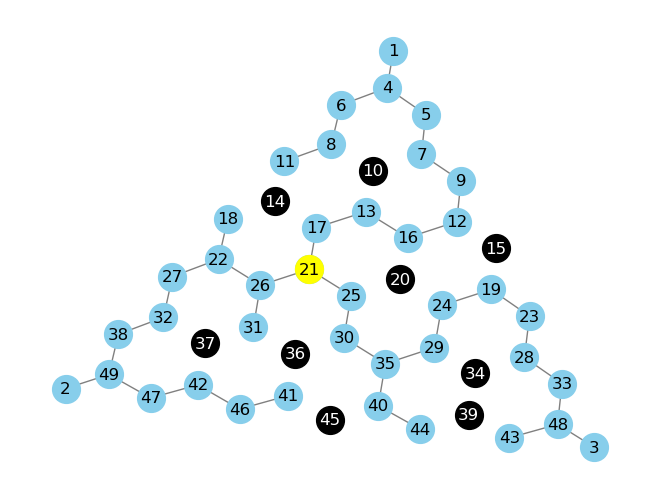

Potential maze 2:


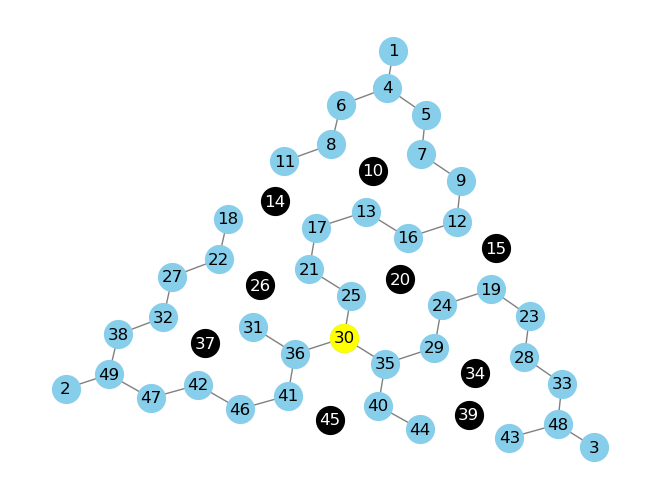

Potential maze 3:


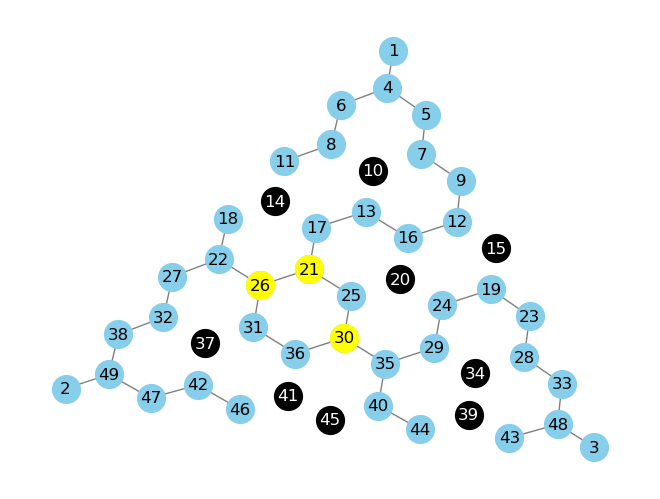

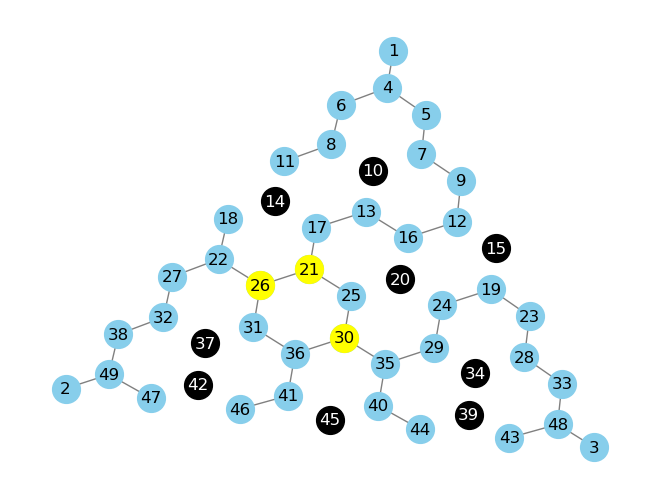

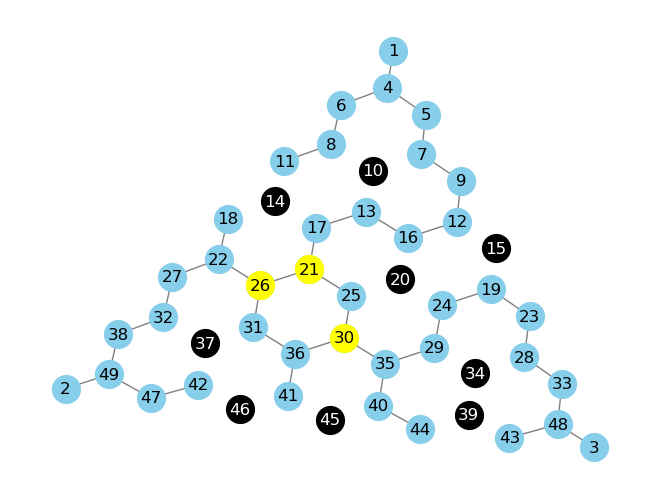

In [19]:
from hex_maze_utils import plot_hex_maze

print("Maze 1:")
plot_hex_maze({34, 36, 37, 39, 10, 45, 14, 15, 20})
print("Potential maze 2:")
plot_hex_maze({34, 37, 39, 10, 45, 14, 15, 20, 26})
#plot_hex_maze({32, 34, 37, 39, 10, 45, 14, 15, 20})
#plot_hex_maze({34, 37, 39, 10, 45, 14, 15, 20, 27})
print("Potential maze 3:")
plot_hex_maze({34, 37, 39, 41, 10, 45, 14, 15, 20})
plot_hex_maze({34, 37, 39, 10, 42, 45, 14, 15, 20})
plot_hex_maze({34, 37, 39, 10, 45, 14, 15, 46, 20})

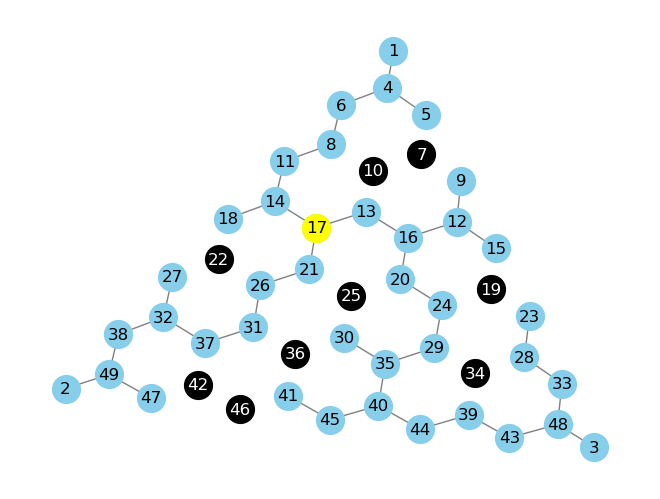

We have 2 sets of potential next barriers:
frozenset({34, 36, 8, 10, 42, 46, 19, 22, 25})
next barriers for this set:
{frozenset({34, 36, 9, 10, 42, 46, 19, 22, 25})}

frozenset({34, 36, 10, 11, 42, 46, 19, 22, 25})
next barriers for this set:
{frozenset({34, 36, 9, 10, 42, 46, 19, 22, 25})}



In [25]:
original_barriers = {34, 36, 7, 10, 42, 46, 19, 22, 25}
plot_hex_maze(original_barriers)

potential_next_barriers = get_next_barrier_set(df, original_barriers)


print(f"We have {len(potential_next_barriers)} sets of potential next barriers:")
for b in potential_next_barriers:
    print(b)
    next_barriers = set(get_next_barrier_set(df, b))
    next_barriers.discard(original_barriers) # make sure we don't go backwards!!
    print("next barriers for this set:")
    print(next_barriers)
    print("")


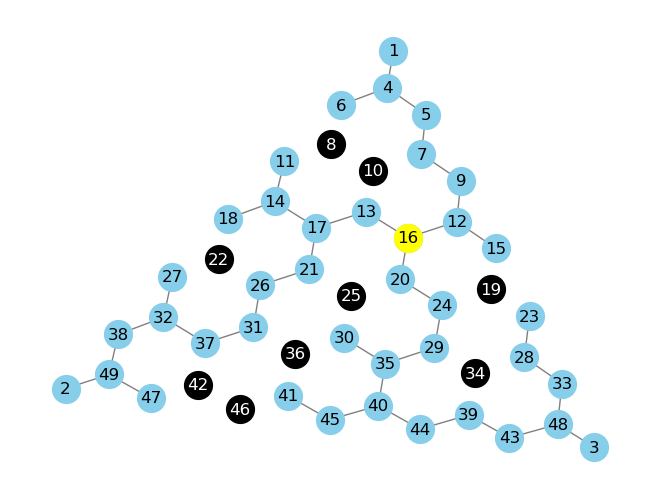

In [26]:
plot_hex_maze({34, 36, 8, 10, 42, 46, 19, 22, 25})

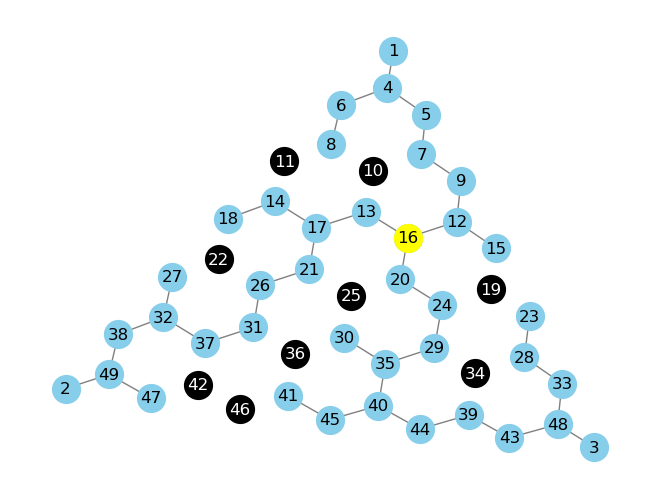

In [29]:
plot_hex_maze({34, 36, 10, 11, 42, 46, 19, 22, 25})

In [58]:
from hex_maze_utils import get_next_barrier_set

# Load the database
df = pd.read_pickle('maze_configuration_database.pkl')




original_barriers = frozenset({34, 36, 7, 10, 42, 46, 19, 22, 25})
next_barrier_sequences = find_all_valid_barrier_sequences(original_barriers)

for sequence in next_barrier_sequences:
    print(sequence)
    for bar in sequence:
        # Get the path lengths between reward ports for this new barrier set
        path_lengths = df[(df['barriers'] == bar)]['reward_path_lengths'].item()
        # Get the choice points between reward ports for this new barrier set
        choice_points = df[(df['barriers'] == bar)]['choice_points'].item()
        print(f"Path lengths: {path_lengths} Choice points: {choice_points}")

[frozenset({34, 36, 7, 10, 42, 46, 19, 22, 25}), frozenset({34, 36, 8, 10, 42, 46, 19, 22, 25})]
Path lengths: [15, 19, 21] Choice points: {17}
Path lengths: [17, 17, 21] Choice points: {16}
[frozenset({34, 36, 7, 10, 42, 46, 19, 22, 25}), frozenset({34, 36, 10, 11, 42, 46, 19, 22, 25})]
Path lengths: [15, 19, 21] Choice points: {17}
Path lengths: [17, 17, 21] Choice points: {16}


In [57]:
from functools import partial


def df_lookup(df, barriers, attribute_name):
    return df[(df['barriers'] == barriers)][attribute_name].item()


def have_common_optimal_paths(df, barriers_1, barriers_2):
    '''
    Given the hex maze database and 2 barrier sets, check if the 2 barrier sets have at
    least one common optimal path between every pair of reward ports (e.g. the barrier sets
    share an optimal path between ports 1 and 2, AND ports 1 and 3, AND ports 2 and 3), 
    meaning the rat could be running the same paths even though the barrier sets are different.
    
    Returns:
    True if the barrier sets have a common optimal path between all pairs of reward ports, False otherwise
    '''
    # Do these barrier sets have a common optimal path from port 1 to port 2?
    have_common_path_12 = have_common_path(
        df_lookup(df, barriers_1, 'optimal_paths_12'), 
        df_lookup(df, barriers_2, 'optimal_paths_12'))
    # Do these barrier sets have a common optimal path from port 1 to port 3?
    have_common_path_13 = have_common_path(
        df_lookup(df, barriers_1, 'optimal_paths_13'), 
        df_lookup(df, barriers_2, 'optimal_paths_13'))
    # Do these barrier sets have a common optimal path from port 2 to port 3?
    have_common_path_23 = have_common_path(
        df_lookup(df, barriers_1, 'optimal_paths_23'), 
        df_lookup(df, barriers_2, 'optimal_paths_23'))
    
    # Return True if the barrier sets have a common optimal path between all pairs of reward ports
    return (have_common_path_12 and have_common_path_13 and have_common_path_23)


def at_least_one_path_shorter_and_longer(df, barriers_1, barriers_2):
    ''' 
    Given 2 sets of barriers, check if at least one optimal path between reward ports
    is shorter AND at least one is longer (e.g. the path length between ports 1 and 2
    increases and the path length between ports 2 and 3 decreases.
    
    Returns: 
    True if at least one path is shorter AND at least one is longer, False otherwise
    '''
    # Get path lengths between reward ports for each barrier set
    paths_1 = df_lookup(df, barriers_1, 'reward_path_lengths')
    paths_2 = df_lookup(df, barriers_2, 'reward_path_lengths')
    
    # Check if >=1 path is longer and >=1 path is shorter
    return (any(a < b for a, b in zip(paths_1, paths_2)) and any(a > b for a, b in zip(paths_1, paths_2)))


def optimal_path_order_changed(df, barriers_1, barriers_2):
    ''' 
    Given 2 sets of barriers, check if the length order of the optimal paths
    between reward ports has changed (e.g. the shortest path between reward ports
    used to be between ports 1 and 2 and is now between ports 2 and 3, etc.)
    
    Returns: 
    True if the optimal path length order has changed, False otherwise
    '''
    
    # Get path lengths between reward ports for each barrier set
    paths_1 = df_lookup(df, barriers_1, 'reward_path_lengths')
    paths_2 = df_lookup(df, barriers_2, 'reward_path_lengths')
    
     # Find which are the longest and shortest paths (multiple paths may tie for longest/shortest)
    longest_paths_1 = [i for i, num in enumerate(paths_1) if num == max(paths_1)]
    shortest_paths_1 = [i for i, num in enumerate(paths_1) if num == min(paths_1)]
    longest_paths_2 = [i for i, num in enumerate(paths_2) if num == max(paths_2)]
    shortest_paths_2 = [i for i, num in enumerate(paths_2) if num == min(paths_2)]
    
    # Check that both the longest and shortest paths are not the same
    return not any(l in longest_paths_2 and s in shortest_paths_2 for l in longest_paths_1 for s in shortest_paths_1)


def no_common_choice_points(df, barriers_1, barriers_2):
    ''' 
    Given 2 sets of barriers, ensure there are no common choice points between them.
    
    Returns: 
    True if there are no common choice points, False otherwise
    '''
    
    # Get the choice points for each barrier set
    choice_points_1 = df_lookup(df, barriers_1, 'choice_points')
    choice_points_2 = df_lookup(df, barriers_2, 'choice_points')
    
    # Check if there are no choice points in common
    return choice_points_1.isdisjoint(choice_points_2)


def get_next_barrier_sets(df, original_barriers, criteria=['one_path_shorter_and_longer', 'optimal_path_order_changed', 'no_common_choice_points'], criteria_type='ANY'):
    '''
    Given the hex maze database (df) and set of original barriers, get a list 
    of next barrier sets created by the movement of a single barrier. The next
    barrier set must not have the same optimal paths between all reward ports. 
    
    Option to specify additional criteria (as a list of strings):
    - 'one_path_shorter_and_longer': at least one path increases in length 
    and another decreases in length compared to the original barrier set.
    - 'optimal_path_order_changed': the length order of the optimal paths
    between reward ports has changed (e.g. the shortest path between reward ports
    used to be between ports 1 and 2 and is now between ports 2 and 3, etc.)
    - 'no_common_choice_points': the 2 configurations have no choice points
    in common
    
    Option to specify criteria type:
    - 'ANY' (default): the next barrier set is valid if it satisfies ANY of the criteria
    - 'ALL': the next barrier set is valid if it satisfies ALL of the criteria
    
    Returns:
    list of sets: a list of potential new barrier sets
    '''
    
    criteria_functions = {
        "one_path_shorter_and_longer": partial(at_least_one_path_shorter_and_longer, df, original_barriers),
        "optimal_path_order_changed": partial(optimal_path_order_changed, df, original_barriers),
        "no_common_choice_points": partial(no_common_choice_points, df, original_barriers)
    }
    
    # Find other valid mazes in the df that differ by the movement of a single barrier
    potential_new_barriers = [b for b in df['barriers'] if single_barrier_moved(b, original_barriers)]
    
    # Set up a list for the ones that meet our criteria
    new_barriers = []
    
    # For each potential new barrier set, make sure it meets all of our criteria
    for bar in potential_new_barriers:
        # Ensure the next barrier set doesn't have the same optimal paths between all reward ports
        if have_common_optimal_paths(df, original_barriers, bar):
            continue
            
        # Check our other criteria
        if criteria_type == "ALL":
            new_maze_meets_criteria = all(criteria_functions[criterion](bar) for criterion in criteria)
        else: # if not specified as "ALL", I choose to assume ANY
            new_maze_meets_criteria = any(criteria_functions[criterion](bar) for criterion in criteria)
        
        # If our new maze met all of the criteria, add it!
        if new_maze_meets_criteria:
            new_barriers.append(bar)
            
    return new_barriers


def find_all_valid_barrier_sequences(start_barrier_set):
    """
    Finds all valid sequences of barriers starting from the given start_barrier_set.

    This function recursively generates all sequences of barrier sets where each barrier set
    in the sequence differs from the previous by the movement of a single barrier.
    The optimal paths that the rat can travel between reward ports should be different
    for all barrier sets in a sequence.
    It ensures that no barrier set is revisited to avoid cycles and repetitions.

    Args:
        start_barrier_set (set): The initial barrier set to start generating sequences from.

    Returns:
        list of list of sets: A list of all valid sequences of barriers. Each sequence
                              is represented as a list of sets.
    """
    
    def helper(current_barrier_set, visited):
        """
        A helper function to recursively find all valid sequences of barrier sets.

        Args:
            current_barrier_set (set): The current barrier set being processed.
            visited (set): A set of barrier sets that have already been visited to avoid cycles.

        Returns:
            list of list of sets: A list of all valid sequences starting from the current_barrier_set.
                                  Each sequence is represented as a list of sets.
        """
        # Search the database for all valid new barrier sets from the current barrier set
        next_sets = get_next_barrier_sets(df, current_barrier_set)
        
        # Remove the current barrier set from the next sets to avoid self-referencing
        next_sets = [s for s in next_sets if s != current_barrier_set]
        
        # Remove barrier sets that have the same optimal paths as any set in the sequence
        next_sets = [s for s in next_sets if not any(have_common_optimal_paths(df, s, v) for v in visited)]
        
        # Initialize a list to store sequences
        sequences = []
        
        # Iterate over each next valid set
        for next_set in next_sets:
            if next_set not in visited:
                # Mark the next set as visited
                visited.add(next_set)
                
                # Recursively find sequences from the next set
                subsequences = helper(next_set, visited)
                
                # Append the current set to the beginning of each subsequence
                for subsequence in subsequences:
                    sequences.append([current_barrier_set] + subsequence)
                
                # Unmark the next set as visited (backtrack)
                visited.remove(next_set)
        
        # If no valid sequences were found, return the current barrier set as the only sequence
        if not sequences:
            return [[current_barrier_set]]
        
        return sequences
    
    # Start the recursive search with the initial barrier set and an empty visited set
    return helper(start_barrier_set, {start_barrier_set})

In [ ]:
#Trash below here

In [59]:

barrier_sequence = []

original_barriers = {34, 36, 37, 39, 10, 45, 14, 15, 20}

barrier_sequence.append(original_barriers)

potential_next_barriers = get_next_barrier_set(df, original_barriers)

print(f"We have {len(potential_next_barriers)} sets of potential next barriers:")
for b in potential_next_barriers:
    print(b)
    next_barriers = set(get_next_barrier_set(df, b))
    next_barriers.discard(original_barriers) # make sure we don't go backwards!!
    print("next barriers for this set:")
    print(next_barriers)
    print("")


def have_common_path(paths1, paths2):
    '''
    Given 2 lists of hex paths, check if there is a common path between the 2 lists.
    Used for determining if there are shared optimal paths between mazes.
    
    Returns:
    True if there is a common path between the 2 lists of paths, False otherwise.
    '''
    # Convert the path lists to tuples to make them hashable and store them in sets
    pathset1 = set(tuple(path) for path in paths1)
    pathset2 = set(tuple(path) for path in paths2)
    
    # Return True if there is 1 or more common path between the path sets, False otherwise
    return len(pathset1.intersection(pathset2)) > 0



We have 3 sets of potential next barriers:
frozenset({34, 37, 39, 10, 45, 14, 15, 20, 26})
next barriers for this set:
{frozenset({34, 37, 39, 41, 10, 45, 14, 15, 20}), frozenset({34, 37, 39, 10, 42, 45, 14, 15, 20}), frozenset({34, 37, 39, 10, 45, 14, 15, 46, 20})}

frozenset({32, 34, 37, 39, 10, 45, 14, 15, 20})
next barriers for this set:
{frozenset({34, 37, 39, 41, 10, 45, 14, 15, 20}), frozenset({34, 37, 39, 10, 42, 45, 14, 15, 20}), frozenset({34, 37, 39, 10, 45, 14, 15, 46, 20})}

frozenset({34, 37, 39, 10, 45, 14, 15, 20, 27})
next barriers for this set:
{frozenset({34, 37, 39, 41, 10, 45, 14, 15, 20}), frozenset({34, 37, 39, 10, 42, 45, 14, 15, 20}), frozenset({34, 37, 39, 10, 45, 14, 15, 46, 20})}

